# Part 01

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
dataset1 = pd.read_csv("F://Uni/991/Machine_Learning/ML_HW1/Dataset/dataset1.csv")
datasetsize = np.size(dataset1["x"])

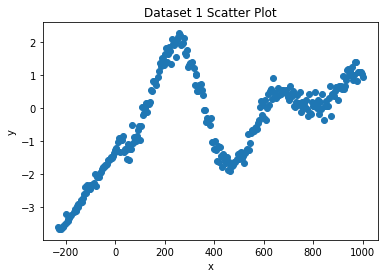

In [3]:
x = np.ones((datasetsize, 1))
x[:,0] = dataset1["x"]
y = np.ones((datasetsize, 1))
y[:,0] = dataset1["y"]
plt.scatter(x,y)
plt.title("Dataset 1 Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
dataset1 = dataset1.sample(frac=1 ,replace=False, axis = 0).reset_index(drop=True)

In [5]:
split = int(0.8 * datasetsize)
df_train1 = dataset1.iloc[:split,:] 
df_test1 = dataset1.iloc[split:,:] 

In [6]:
x1_train = np.ones((split, 1))
x1_train[:,0] = df_train1["x"]
y1_train = np.ones((split, 1))
y1_train[:,0] = df_train1["y"]
y1_train[:,0] = y1_train[np.argsort(x1_train[:,0]),0]
x1_train[:,0] = np.sort(x1_train[:,0])

x1_test = np.ones((datasetsize-split, 1))
x1_test[:,0] = df_test1["x"]
y1_test = np.ones((datasetsize-split, 1))
y1_test[:,0] = df_test1["y"]
y1_test[:,0] = y1_test[np.argsort(x1_test[:,0]),0]
x1_test[:,0] = np.sort(x1_test[:,0])


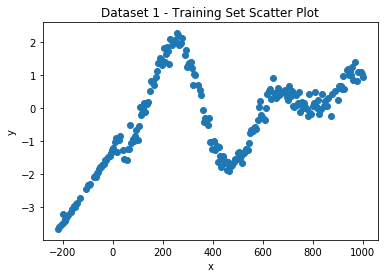

In [7]:
plt.scatter(x1_train,y1_train)
plt.title("Dataset 1 - Training Set Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

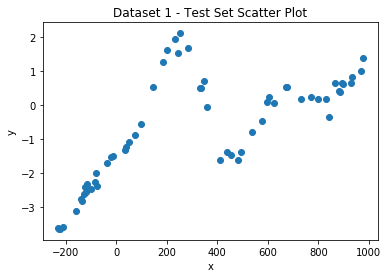

In [8]:
plt.scatter(x1_test,y1_test)
plt.title("Dataset 1 - Test Set Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [9]:
def Initialize(x, datasize, degree):
    x_set = np.ones((datasize, degree))    
    for i in range(0,degree):
        x_set[:,i] = np.power(x[:,0],i)
    return x_set

In [10]:
def Normalize(datasize, degree, x_set):
    norm_x = np.ones((datasize, degree))
    for i in range(1,degree):
        min_x = np.amin(x_set[:,i])
        max_x = np.amax(x_set[:,i])
        norm_x[:,i] = (x_set[:,i] - min_x)/(max_x - min_x)
    return norm_x

In [11]:
def ComputeHypothesis(norm_x, datasize, theta):
    h_of_x = np.ones((datasize, 1))
    for i in range(0,datasize):
        h_of_x[i] = np.dot(np.transpose(theta), np.expand_dims(norm_x[i,:], axis=1))
    return h_of_x

In [12]:
def GradientDescent(y, norm_x, datasize, degree, num_iter, alpha, landa):
    theta = np.ones((degree, 1))
    for i in range(num_iter):
        h_of_x = ComputeHypothesis(norm_x, datasize, theta)
        theta[0,0] = theta[0,0] - ((alpha/datasize) * np.sum(h_of_x - y))
        for j in range(1, degree):
            theta[j,0] = theta[j,0] - ((alpha/datasize)* (np.sum(np.dot(np.transpose(h_of_x - y),np.expand_dims(norm_x[:,j], axis=1))) + (landa*theta[j,0])))
    return theta

In [13]:
def ComputeCost(y, h_of_x, datasize, theta, landa):
    mse = (1/datasize) * (np.sum(np.power(h_of_x - y, 2)) + (landa * np.sum(np.power(theta, 2))))
    return mse

In [14]:
def Regression(d, alpha, num_iter, landa, x, y):
    degree = d+1
    datasize = x.size
    x_set = Initialize(x, datasize, degree)
    norm_x = Normalize(datasize, degree, x_set)
    theta = GradientDescent(y, norm_x, datasize, degree, num_iter, alpha, landa)
    h_of_x = ComputeHypothesis(norm_x, datasize, theta)
    mse = ComputeCost(y, h_of_x, datasize, theta, landa)
    print("Theta: ", theta)
    print("Train Mean Squared Error: ", mse)
    return theta, h_of_x, x_set, norm_x, mse

In [15]:
def Predict(d, landa, x, y, theta):
    degree = d+1
    datasize = x.size
    x_set = np.ones((datasize, degree))
    x_set = Initialize(x, datasize, degree)
    norm_x = Normalize(datasize, degree, x_set)
    h_of_x_p = ComputeHypothesis(norm_x, datasize, theta)
    mse = ComputeCost(y, h_of_x_p, datasize, theta, landa)
    print("Test Mean Squared Error: ", mse)
    return h_of_x_p, mse

In [16]:
d = np.array([1, 2, 4, 8, 12])
a = np.array([[0.03, 0.03, 0.03], [0.05, 0.05, 0.05], [0.5, 0.5, 0.5], [0.99, 0.99, 0.99], [0.99, 0.99, 0.99]])
num = np.array([5000, 50000, 300000])
l = 0

# Exercise 03

## Number of Iterations = 5000

In [17]:
train_theta100, train_h_of_x100, train_x_set100, train_norm_x100, train_mse100 = Regression(d[0], a[0,0], num[0], l, x1_train, y1_train)
test_h_of_x100,test_mse100 = Predict(d[0], l, x1_test, y1_test, train_theta100)

Theta:  [[-1.61826763]
 [ 2.55001757]]
Train Mean Squared Error:  1.3329810708099803
Test Mean Squared Error:  1.3694293912754523


In [18]:
train_theta200, train_h_of_x200, train_x_set200, train_norm_x200, train_mse200 = Regression(d[1], a[1,0], num[0], l, x1_train, y1_train)
test_h_of_x200,test_mse200 = Predict(d[1], l, x1_test, y1_test, train_theta200)

Theta:  [[-2.11452619]
 [ 4.96549846]
 [-2.60938481]]
Train Mean Squared Error:  1.1762328229587824
Test Mean Squared Error:  1.060626618922919


In [19]:
train_theta300, train_h_of_x300, train_x_set300, train_norm_x300, train_mse300 = Regression(d[2], a[2,0], num[0], l, x1_train, y1_train)
test_h_of_x300,test_mse300 = Predict(d[2], l, x1_test, y1_test, train_theta300)

Theta:  [[ -2.98768861]
 [ 11.01356566]
 [-17.29901694]
 [  1.63435695]
 [  9.43518081]]
Train Mean Squared Error:  0.7458668666106968
Test Mean Squared Error:  0.572300422575138


In [20]:
train_theta400, train_h_of_x400, train_x_set400, train_norm_x400, train_mse400 = Regression(d[3], a[3,0], num[0], l, x1_train, y1_train)
test_h_of_x400,test_mse400 = Predict(d[3], l, x1_test, y1_test, train_theta400)

Theta:  [[ -3.06251504]
 [ 11.95542543]
 [-21.35164638]
 [  2.08843222]
 [  9.55900101]
 [  8.42986512]
 [  3.33079451]
 [ -2.42369096]
 [ -7.52381841]]
Train Mean Squared Error:  0.6668904915551802
Test Mean Squared Error:  0.5409508859272895


In [21]:
train_theta500, train_h_of_x500, train_x_set500, train_norm_x500, train_mse500 = Regression(d[4], a[4,0], num[0], l, x1_train, y1_train)
test_h_of_x500,test_mse500 = Predict(d[4], l, x1_test, y1_test, train_theta500)

Theta:  [[ -3.12184913]
 [ 12.28764284]
 [-20.37592092]
 [ -0.12179727]
 [  7.2510098 ]
 [  7.55931636]
 [  4.80586762]
 [  1.76218452]
 [ -0.55853415]
 [ -1.94322958]
 [ -2.50920145]
 [ -2.46221482]
 [ -2.00102174]]
Train Mean Squared Error:  0.6804802706166124
Test Mean Squared Error:  0.5651535579931687


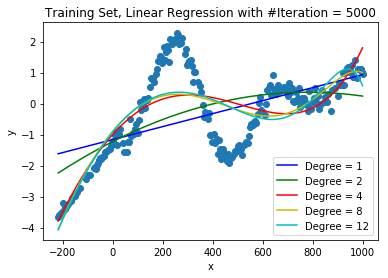

In [80]:
plt.scatter(x1_train,y1_train)
plt.plot(x1_train,train_h_of_x100,'-',color='b', label = "Degree = 1")
plt.plot(x1_train,train_h_of_x200,'-',color='g', label = "Degree = 2")
plt.plot(x1_train,train_h_of_x300,'-',color='r', label = "Degree = 4")
plt.plot(x1_train,train_h_of_x400,'-',color='y', label = "Degree = 8")
plt.plot(x1_train,train_h_of_x500,'-',color='c', label = "Degree = 12")
plt.title("Training Set, Linear Regression with #Iteration = 5000")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

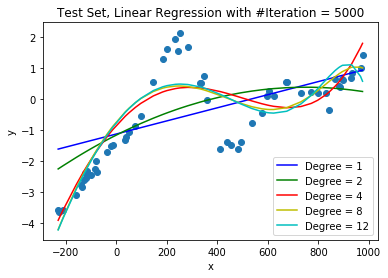

In [81]:
plt.scatter(x1_test,y1_test)
plt.plot(x1_test,test_h_of_x100,'-',color='b', label = "Degree = 1")
plt.plot(x1_test,test_h_of_x200,'-',color='g', label = "Degree = 2")
plt.plot(x1_test,test_h_of_x300,'-',color='r', label = "Degree = 4")
plt.plot(x1_test,test_h_of_x400,'-',color='y', label = "Degree = 8")
plt.plot(x1_test,test_h_of_x500,'-',color='c', label = "Degree = 12")
plt.title("Test Set, Linear Regression with #Iteration = 5000")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Number of Iterations = 50000

In [24]:
train_theta111, train_h_of_x111, train_x_set111, train_norm_x111, train_mse111 = Regression(d[0], a[0,1], num[1], l, x1_train, y1_train)
test_h_of_x111,test_mse111 = Predict(d[0], l, x1_test, y1_test, train_theta111)

Theta:  [[-1.61836873]
 [ 2.55020385]]
Train Mean Squared Error:  1.3329810679919434
Test Mean Squared Error:  1.369388800788732


In [25]:
train_theta211, train_h_of_x211, train_x_set211, train_norm_x211, train_mse211 = Regression(d[1], a[1,1], num[1], l, x1_train, y1_train)
test_h_of_x211,test_mse211 = Predict(d[1], l, x1_test, y1_test, train_theta211)

Theta:  [[-2.4198339 ]
 [ 6.21794446]
 [-3.8006327 ]]
Train Mean Squared Error:  1.1582134285572458
Test Mean Squared Error:  0.9685114438458106


In [26]:
train_theta311, train_h_of_x311, train_x_set311, train_norm_x311, train_mse311 = Regression(d[2], a[2,1], num[1], l, x1_train, y1_train)
test_h_of_x311,test_mse311 = Predict(d[2], l, x1_test, y1_test, train_theta311)

Theta:  [[ -3.10377596]
 [ 11.70380585]
 [-23.72652027]
 [ 13.8711442 ]
 [  2.99940168]]
Train Mean Squared Error:  0.7210752034621795
Test Mean Squared Error:  0.5907697831212017


In [27]:
train_theta411, train_h_of_x411, train_x_set411, train_norm_x411, train_mse411 = Regression(d[3], a[3,1], num[1], l, x1_train, y1_train)
test_h_of_x411,test_mse411 = Predict(d[3], l, x1_test, y1_test, train_theta411)

Theta:  [[ -3.19624961]
 [ 13.56611834]
 [-23.95103709]
 [ -7.96121639]
 [ 24.47227017]
 [ 14.65882515]
 [ -0.26089426]
 [ -9.0375562 ]
 [ -7.70219128]]
Train Mean Squared Error:  0.6318154433969158
Test Mean Squared Error:  0.5423285887075443


In [28]:
train_theta511, train_h_of_x511, train_x_set511, train_norm_x511, train_mse511 = Regression(d[4], a[4,1], num[1], l, x1_train, y1_train)
test_h_of_x511,test_mse511 = Predict(d[4], l, x1_test, y1_test, train_theta511)

Theta:  [[ -3.18964124]
 [ 13.8819303 ]
 [-26.3769878 ]
 [ -8.7259193 ]
 [ 28.82708905]
 [ 20.4108742 ]
 [  3.33240001]
 [-10.50732155]
 [-16.17503999]
 [-14.23997901]
 [ -6.74500844]
 [  4.1302729 ]
 [ 16.6225057 ]]
Train Mean Squared Error:  0.5907546937422282
Test Mean Squared Error:  0.5003411446325391


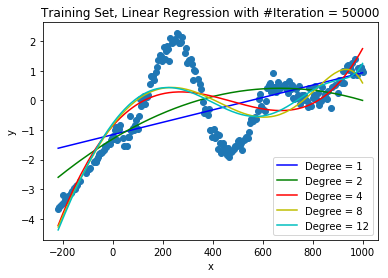

In [82]:
plt.scatter(x1_train,y1_train)
plt.plot(x1_train,train_h_of_x111,'-',color='b', label = "Degree = 1")
plt.plot(x1_train,train_h_of_x211,'-',color='g', label = "Degree = 2")
plt.plot(x1_train,train_h_of_x311,'-',color='r', label = "Degree = 4")
plt.plot(x1_train,train_h_of_x411,'-',color='y', label = "Degree = 8")
plt.plot(x1_train,train_h_of_x511,'-',color='c', label = "Degree = 12")
plt.title("Training Set, Linear Regression with #Iteration = 50000")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

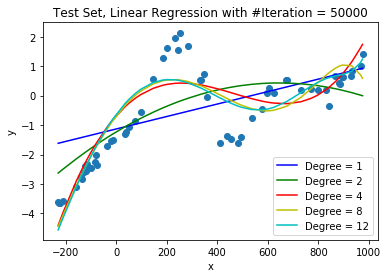

In [83]:
plt.scatter(x1_test,y1_test)
plt.plot(x1_test,test_h_of_x111,'-',color='b', label = "Degree = 1")
plt.plot(x1_test,test_h_of_x211,'-',color='g', label = "Degree = 2")
plt.plot(x1_test,test_h_of_x311,'-',color='r', label = "Degree = 4")
plt.plot(x1_test,test_h_of_x411,'-',color='y', label = "Degree = 8")
plt.plot(x1_test,test_h_of_x511,'-',color='c', label = "Degree = 12")
plt.title("Test Set, Linear Regression with #Iteration = 50000")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Number of Iterations = 300000

In [31]:
train_theta122, train_h_of_x122, train_x_set122, train_norm_x122, train_mse122 = Regression(d[0], a[0,2], num[2], l, x1_train, y1_train)
test_h_of_x122,test_mse122 = Predict(d[0], l, x1_test, y1_test, train_theta122)

Theta:  [[-1.61836873]
 [ 2.55020385]]
Train Mean Squared Error:  1.3329810679919434
Test Mean Squared Error:  1.369388800788732


In [32]:
train_theta222, train_h_of_x222, train_x_set222, train_norm_x222, train_mse222 = Regression(d[1], a[1,2], num[2], l, x1_train, y1_train)
test_h_of_x222,test_mse222 = Predict(d[1], l, x1_test, y1_test, train_theta222)

Theta:  [[-2.41983449]
 [ 6.21794687]
 [-3.80063499]]
Train Mean Squared Error:  1.158213428557179
Test Mean Squared Error:  0.9685113183306272


In [33]:
train_theta322, train_h_of_x322, train_x_set322, train_norm_x322, train_mse322 = Regression(d[2], a[2,2], num[2], l, x1_train, y1_train)
test_h_of_x322,test_mse322 = Predict(d[2], l, x1_test, y1_test, train_theta322)

Theta:  [[ -3.11794364]
 [ 11.72517914]
 [-28.88131646]
 [ 26.54595286]
 [ -4.720654  ]]
Train Mean Squared Error:  0.7134315801354657
Test Mean Squared Error:  0.6339719534982807


In [34]:
train_theta422, train_h_of_x422, train_x_set422, train_norm_x422, train_mse422 = Regression(d[3], a[3,2], num[2], l, x1_train, y1_train)
test_h_of_x422,test_mse422 = Predict(d[3], l, x1_test, y1_test, train_theta422)

Theta:  [[ -3.18795591]
 [ 15.12726548]
 [-20.20999468]
 [-45.81922465]
 [ 81.21972334]
 [ 21.52094171]
 [-34.16831514]
 [-37.40508031]
 [ 23.62108673]]
Train Mean Squared Error:  0.5693248510175506
Test Mean Squared Error:  0.4528281466271646


In [35]:
train_theta522, train_h_of_x522, train_x_set522, train_norm_x522, train_mse522 = Regression(d[4], a[4,2], num[2], l, x1_train, y1_train)
test_h_of_x522,test_mse522 = Predict(d[4], l, x1_test, y1_test, train_theta522)

Theta:  [[ -3.25629061]
 [ 16.74016065]
 [-14.34020831]
 [-78.59026568]
 [ 84.42887018]
 [ 61.39274243]
 [  7.79426723]
 [-34.11286199]
 [-47.29503597]
 [-36.92498314]
 [-12.78767299]
 [ 15.98420277]
 [ 42.83479461]]
Train Mean Squared Error:  0.47973121253887496
Test Mean Squared Error:  0.35486832870766455


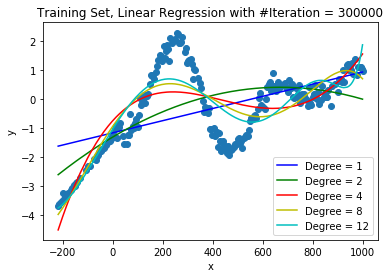

In [84]:
plt.scatter(x1_train,y1_train)
plt.plot(x1_train,train_h_of_x122,'-',color='b', label = "Degree = 1")
plt.plot(x1_train,train_h_of_x222,'-',color='g', label = "Degree = 2")
plt.plot(x1_train,train_h_of_x322,'-',color='r', label = "Degree = 4")
plt.plot(x1_train,train_h_of_x422,'-',color='y', label = "Degree = 8")
plt.plot(x1_train,train_h_of_x522,'-',color='c', label = "Degree = 12")
plt.title("Training Set, Linear Regression with #Iteration = 300000")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

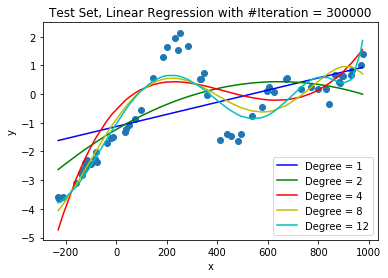

In [85]:
plt.scatter(x1_test,y1_test)
plt.plot(x1_test,test_h_of_x122,'-',color='b', label = "Degree = 1")
plt.plot(x1_test,test_h_of_x222,'-',color='g', label = "Degree = 2")
plt.plot(x1_test,test_h_of_x322,'-',color='r', label = "Degree = 4")
plt.plot(x1_test,test_h_of_x422,'-',color='y', label = "Degree = 8")
plt.plot(x1_test,test_h_of_x522,'-',color='c', label = "Degree = 12")
plt.title("Test Set, Linear Regression with #Iteration = 300000")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Exercise 04

## Number of Iterations = 50000 landa = 1

In [38]:
l = 1

In [39]:
train_theta4111, train_h_of_x4111, train_x_set4111, train_norm_x4111, train_mse4111 = Regression(d[3], a[3,1], num[1], l, x1_train, y1_train)
test_h_of_x4111,test_mse4111 = Predict(d[3], l, x1_test, y1_test, train_theta4111)

Theta:  [[-1.91343631]
 [ 4.66766138]
 [-3.10599036]
 [-0.91530935]
 [-0.03375977]
 [ 0.52476309]
 [ 0.70213797]
 [ 0.71930443]
 [ 0.66588558]]
Train Mean Squared Error:  1.2467135971166705
Test Mean Squared Error:  1.6779589410256972


## Number of Iterations = 50000 landa = 0.5

In [40]:
l = 0.5

In [41]:
train_theta4112, train_h_of_x4112, train_x_set4112, train_norm_x4112, train_mse4112 = Regression(d[3], a[3,1], num[1], l, x1_train, y1_train)
test_h_of_x4112,test_mse4112 = Predict(d[3], l, x1_test, y1_test, train_theta4112)

Theta:  [[-2.1940669 ]
 [ 6.10846299]
 [-5.25556494]
 [-1.12147946]
 [ 0.40178391]
 [ 1.10118987]
 [ 1.09734931]
 [ 0.83511532]
 [ 0.49490832]]
Train Mean Squared Error:  1.13988645861043
Test Mean Squared Error:  1.4967892066079558


## Number of Iterations = 50000 landa = 0.1

In [42]:
l = 0.1

In [43]:
train_theta4113, train_h_of_x4113, train_x_set4113, train_norm_x4113, train_mse4113 = Regression(d[3], a[3,1], num[1], l, x1_train, y1_train)
test_h_of_x4113,test_mse4113 = Predict(d[3], l, x1_test, y1_test, train_theta4113)

Theta:  [[ -2.72157977]
 [  9.37264612]
 [-12.99178238]
 [ -0.03784025]
 [  4.23933234]
 [  4.33929665]
 [  2.24596751]
 [ -0.32962087]
 [ -2.70717618]]
Train Mean Squared Error:  0.9085431027423044
Test Mean Squared Error:  1.1324923633732102


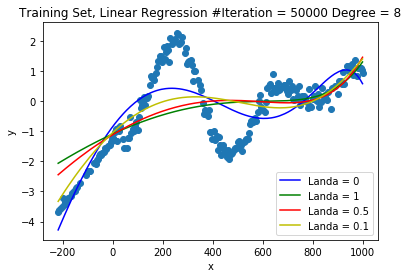

In [86]:
plt.scatter(x1_train,y1_train)
plt.plot(x1_train,train_h_of_x411,'-',color='b', label= "Landa = 0")
plt.plot(x1_train,train_h_of_x4111,'-',color='g', label= "Landa = 1")
plt.plot(x1_train,train_h_of_x4112,'-',color='r', label= "Landa = 0.5")
plt.plot(x1_train,train_h_of_x4113,'-',color='y', label= "Landa = 0.1")
plt.title("Training Set, Linear Regression #Iteration = 50000 Degree = 8")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'lower right')
plt.show()

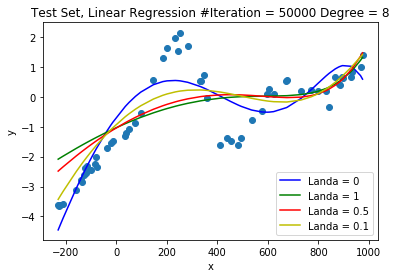

In [87]:
plt.scatter(x1_test,y1_test)
plt.plot(x1_test,test_h_of_x411,'-',color='b', label= "Landa = 0")
plt.plot(x1_test,test_h_of_x4111,'-',color='g', label= "Landa = 1")
plt.plot(x1_test,test_h_of_x4112,'-',color='r', label= "Landa = 0.5")
plt.plot(x1_test,test_h_of_x4113,'-',color='y', label= "Landa = 0.1")
plt.title("Test Set, Linear Regression #Iteration = 50000 Degree = 8")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'lower right')
plt.show()

# Exercise 05

In [46]:
def NormalEquation(x, y, d):
    degree = d+1
    datasize = x.size
    x_set = np.ones((datasize, degree))
    x_set = Initialize(x, datasize, degree)
    norm_eq_theta = np.empty((degree, 1))
    norm_eq_theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x_set),x_set)), np.transpose(x_set)),y)
    #print(norm_eq_theta)
    norm_h_of_x = ComputeHypothesis(x_set, datasize, norm_eq_theta)
    norm_mse = ComputeCost(y, norm_h_of_x, datasize, norm_eq_theta, 0)
    print("Normal Equation Theta: ", norm_eq_theta)
    print("Normal Equation Mean Squared Error: ", norm_mse)
    return norm_eq_theta, norm_h_of_x, norm_mse

In [47]:
def NEPredict(d, landa, x, y, theta):
    degree = d+1
    datasize = x.size
    x_set = np.ones((datasize, degree))
    x_set = Initialize(x, datasize, degree)
    h_of_x_p = ComputeHypothesis(x_set, datasize, theta)
    mse = ComputeCost(y, h_of_x_p, datasize, theta, landa)
    print("Normal Equation Test Mean Squared Error: ", mse)
    return h_of_x_p, mse

In [48]:
train_norm_eq_theta1, train_norm_h_of_x1, train_norm_mse1 = NormalEquation(x1_train, y1_train, d[0])
#train_norm_eq_theta2, train_norm_h_of_x2, train_norm_mse2 = NormalEquation(x1_train, y1_train, d[1])
train_norm_eq_theta3, train_norm_h_of_x3, train_norm_mse3 = NormalEquation(x1_train, y1_train, d[2])
#train_norm_eq_theta4, train_norm_h_of_x4, train_norm_mse4 = NormalEquation(x1_train, y1_train, d[3])
train_norm_eq_theta5, train_norm_h_of_x5, train_norm_mse5 = NormalEquation(x1_train, y1_train, d[4])

[[-1.1619283 ]
 [ 0.00209376]]
Normal Equation Theta:  [[-1.1619283 ]
 [ 0.00209376]]
Normal Equation Mean Squared Error:  1.3329810679919432
[[-7.43936976e-01]
 [ 9.62703760e-03]
 [-2.90147212e-05]
 [ 2.65981255e-08]
 [-4.92027320e-12]]
Normal Equation Theta:  [[-7.43936976e-01]
 [ 9.62703760e-03]
 [-2.90147212e-05]
 [ 2.65981255e-08]
 [-4.92027320e-12]]
Normal Equation Mean Squared Error:  0.7134267209305873
[[-1.40016310e+00]
 [ 2.17914883e-03]
 [-1.55426862e-05]
 [ 9.91969181e-07]
 [ 4.46891804e-11]
 [-2.91807245e-11]
 [ 5.89493697e-14]
 [ 1.95369374e-16]
 [-9.81137621e-19]
 [ 1.73076956e-21]
 [-1.56708760e-24]
 [ 7.31026278e-28]
 [-1.39729536e-31]]
Normal Equation Theta:  [[-1.40016310e+00]
 [ 2.17914883e-03]
 [-1.55426862e-05]
 [ 9.91969181e-07]
 [ 4.46891804e-11]
 [-2.91807245e-11]
 [ 5.89493697e-14]
 [ 1.95369374e-16]
 [-9.81137621e-19]
 [ 1.73076956e-21]
 [-1.56708760e-24]
 [ 7.31026278e-28]
 [-1.39729536e-31]]
Normal Equation Mean Squared Error:  0.038612606335732075


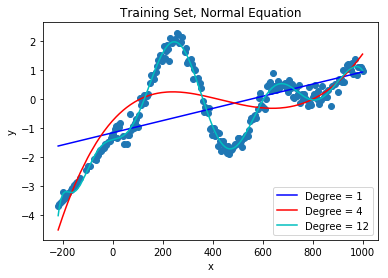

In [88]:
plt.scatter(x1_train,y1_train)
plt.plot(x1_train,train_norm_h_of_x1,'-',color='b', label = "Degree = 1")
#plt.plot(x1_train,train_norm_h_of_x2,'-',color='g', label = "Degree = 2")
plt.plot(x1_train,train_norm_h_of_x3,'-',color='r', label = "Degree = 4")
#plt.plot(x1_train,train_norm_h_of_x4,'-',color='y', label = "Degree = 8")
plt.plot(x1_train,train_norm_h_of_x5,'-',color='c', label = "Degree = 12")
plt.title("Training Set, Normal Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'lower right')
plt.show()

In [52]:
test_norm_h_of_x1,test_norm_mse1 = NEPredict(d[0], 0, x1_test, y1_test, train_norm_eq_theta1)
#test_norm_h_of_x1,test_norm_mse2 = NEPredict(d[1], 0, x1_test, y1_test, train_norm_eq_theta2)
test_norm_h_of_x3,test_norm_mse3 = NEPredict(d[2], 0, x1_test, y1_test, train_norm_eq_theta3)
#test_norm_h_of_x1,test_norm_mse4 = NEPredict(d[3], 0, x1_test, y1_test, train_norm_eq_theta4)
test_norm_h_of_x5,test_norm_mse5 = NEPredict(d[4], 0, x1_test, y1_test, train_norm_eq_theta5)

Normal Equation Test Mean Squared Error:  1.359012112747184
Normal Equation Test Mean Squared Error:  0.6073132045702896
Normal Equation Test Mean Squared Error:  0.11809515648650504


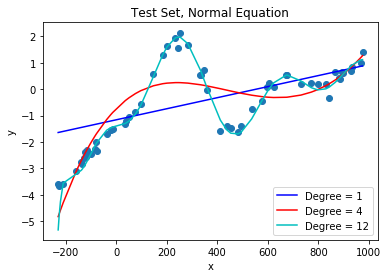

In [89]:
plt.scatter(x1_test,y1_test)
plt.plot(x1_test,test_norm_h_of_x1,'-',color='b', label = "Degree = 1")
#plt.plot(x1_train,train_norm_h_of_x2,'-',color='g', label = "Degree = 2")
plt.plot(x1_test,test_norm_h_of_x3,'-',color='r', label = "Degree = 4")
#plt.plot(x1_train,train_norm_h_of_x4,'-',color='y', label = "Degree = 8")
plt.plot(x1_test,test_norm_h_of_x5,'-',color='c', label = "Degree = 12")
plt.title("Test Set, Normal Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'lower right')
plt.show()

# Part 02

# Exercise 01

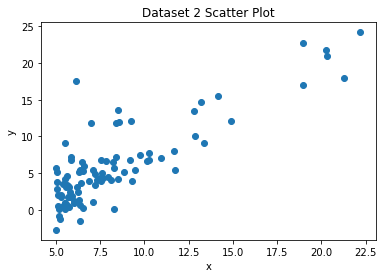

In [54]:
dataset2 = pd.read_csv("F://Uni/991/Machine_Learning/ML_HW1/Dataset/dataset2.csv")
datasetsize2 = np.size(dataset2["x"])
x2 = np.ones((datasetsize2, 1))
x2[:,0] = dataset2["x"]
y2 = np.ones((datasetsize2, 1))
y2[:,0] = dataset2["y"]
plt.scatter(x2,y2)
plt.title("Dataset 2 Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Exercise 02

Theta:  [[ 2.10147995]
 [20.49166518]]
Train Mean Squared Error:  8.953942751950356


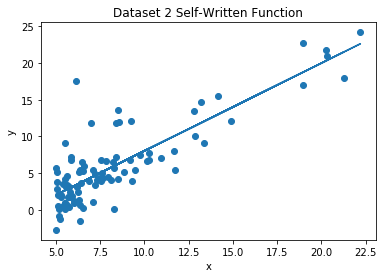

In [59]:
l = 0
theta2, h_of_x2, x_set2, norm_x2, mse2 = Regression(d[0], a[0,1], num[1], l, x2, y2)
plt.scatter(x2,y2)
plt.title("Dataset 2 Self-Written Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x2,h_of_x2)
plt.show()

# Exercise 03

In [60]:
from sklearn.linear_model import LinearRegression

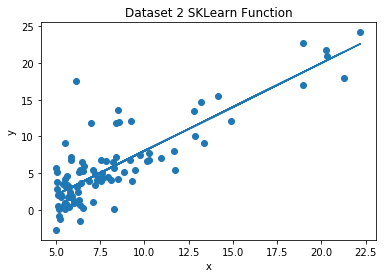

In [61]:
reg = LinearRegression().fit(x2, y2)
prediction = reg.predict(x2)
plt.scatter(x2,y2)
plt.title("Dataset 2 SKLearn Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x2,prediction)
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
mse22 = mean_squared_error(y2, prediction)
print(mse22)

8.953942751950358
